Informe para analizar el BodySim.
Elimina los FillValues y los Ceros.

In [5]:
import numpy as np
import netCDF4

filename = '../body/Washington-1d-2008-09-12_compr.nc'
#varname = 'WQ_O'
#varname = 'WQ_N'
varname='WQ_ALG'
#varname = 'Temp'

nc = netCDF4.Dataset(filename)
# File info format HDF5:

# File info
print(nc) # General attributes
print(nc.dimensions)
print(nc.variables.keys()) # All variables names
print(nc.variables) # All variables and their attributes

# Read variables
#   Not all variables have the same dimensions, see file info for details
lat = np.array(nc['lat'])
lon = np.array(nc['lon'])
bottom = np.array(nc['Bottom'])
sigma = np.array(nc['sigma'])
wsel= np.array(nc['WSEL'])
time= np.array(nc['time'])
layers= np.array(nc['layers'])
var= np.array(nc[varname])

# Remove fill values
#   The cells in which no water is present are filled with FillValue
#   Change FillValue to NaN so that those cells don't appear in the plot
inan=lat == nc['lat'].FillValue
lat[inan] = np.nan
lon[inan] = np.nan
bottom[inan]=np.nan
layers[inan]= np.nan
#sigma[sigma== -999]=np.nan   #No tiene FillValue
sigma[sigma>1]=np.nan
sigma[sigma<0]=np.nan
#sigma[sigma== 0]=np.nan
wsel[wsel== nc['WSEL'].FillValue]=np.nan
#wsel[wsel==0]=np.nan
var[var== nc[varname].FillValue]=np.nan
var[var==0] =np.nan

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): col(78), row(62), cnr(4), lyr(55), time(2881), nalg(1)
    variables(dimensions): float32 lon(row, col), float32 lat(row, col), float32 lon_bnds(row, col, cnr), float32 lat_bnds(row, col, cnr), float32 layers(row, col), float32 sigma(row, lyr, col), float32 time(time), float32 Bottom(row, col), float32 WSEL(time, row, col), float32 Vx(time, row, col, lyr), float32 Vy(time, row, col, lyr), float32 Vz(time, row, col, lyr), float32 Wx(time, row, col), float32 Wy(time, row, col), float32 Temp(time, row, col, lyr), float32 WQ_ALG(time, row, col, lyr, nalg), float32 WQ_C(time, row, col, lyr), float32 WQ_P(time, row, col, lyr), float32 WQ_N(time, row, col, lyr), float32 WQ_S(time, row, col, lyr), float32 WQ_O(time, row, col, lyr)
    groups: 
{'col': <class 'netCDF4._netCDF4.Dimension'>: name = 'col', size = 78, 'row': <class 'netCDF4._netCDF4.Dimension'>: name = 'row', size = 

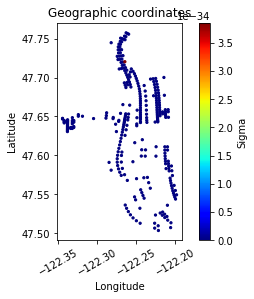

In [6]:
# Plots Botton
import matplotlib.pyplot as plt
l=54
sigma[sigma==0]=np.nan
#plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(lon,lat,c=sigma[:,l,:] , s=5, cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('Longitude'), plt.xticks(rotation=30)
plt.ylabel('Latitude')
cbar.set_label('Sigma')
plt.title('Geographic coordinates')
plt.gca().set_aspect('equal')
plt.show()

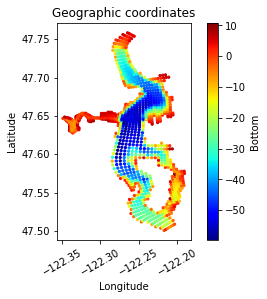

In [7]:

# Plots Botton
#import matplotlib.pyplot as plt

#plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(lon,lat,c=bottom[:,:] , s=5, cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('Longitude'), plt.xticks(rotation=30)
plt.ylabel('Latitude')
cbar.set_label('Bottom')
plt.title('Geographic coordinates')
plt.gca().set_aspect('equal')
plt.show()


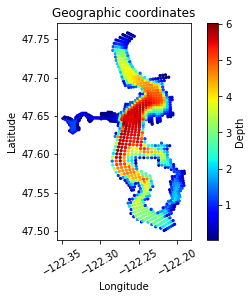

In [8]:
myt=500
myl=5

rt=range(len(wsel))
ri=range(len(bottom))
rj=range(len(bottom[1]))
rl=range(len(sigma[1]))

z=np.zeros((len(sigma[1]),len(bottom),len(bottom[1])))
#myz=np.zeros((len(wsel),len(sigma[1]),len(bottom),len(bottom[1])))

for l in rl:
    for i in ri:
        for j in rj:
            sigma[i,l,j]=-l/55.0     #Sigma está mal la reconstruyo yo.
            z[l][i][j]=-sigma[i,l,j]*(wsel[myt,i,j] - bottom[i,j])
            #for t in rt:
            #    myz[t][l][i][j]=-sigma[i,l,j]*(wsel[t,i,j] - bottom[i,j])

#plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(lon,lat,c=z[myl,:,:] , s=5, cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('Longitude'), plt.xticks(rotation=30)
plt.ylabel('Latitude')
cbar.set_label('Depth')
plt.title('Geographic coordinates')
plt.gca().set_aspect('equal')
plt.show()


Text(0.5, 1.0, 'Water Surface Elevation')

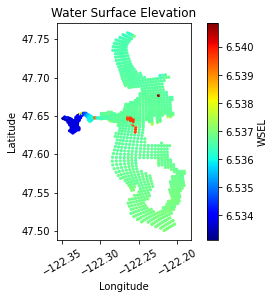

In [9]:
# Plots WSEL
#import matplotlib.pyplot as plt
myt=500
#plt.figure(figsize=(4, 4), dpi=300)
#plt.xlim(-122.35,-122.18)
#plt.ylim(47.5,47.75)
plt.scatter(lon,lat,c=wsel[myt,:,:] , s=5, cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('Longitude'), plt.xticks(rotation=30)
plt.ylabel('Latitude')
cbar.set_label('WSEL')
plt.gca().set_aspect('equal')
plt.title('Water Surface Elevation')

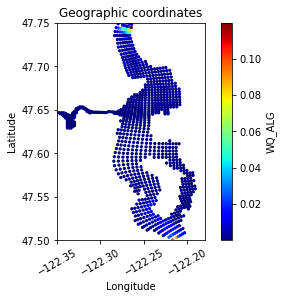

In [10]:
# Plots una variable en un moemtio y una capa
#import matplotlib.pyplot as plt
#varname = 'WQ_O'
#varname = 'WQ_N'
varname='WQ_ALG'
var= np.array(nc[varname])
var[var== nc[varname].FillValue]=np.nan
var[var==0] =np.nan
myl=50
#plt.figure(figsize=(4, 4), dpi=300)
plt.xlim(-122.35,-122.18)
plt.ylim(47.5,47.75)
plt.scatter(lon,lat,c=var[myt,:,:,myl] , s=5, cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('Longitude'), plt.xticks(rotation=30)
plt.ylabel('Latitude')
cbar.set_label(varname)
plt.title('Geographic coordinates')
plt.gca().set_aspect('equal')
plt.show()
